## Import Dependencies and libraries

In [1]:
import numpy as np
import glob
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
import datetime, calendar

# Reading septentrio file and concatenate

### Duration

In [2]:
Start_date = input("Enter time in this format yyyy-mm-dd")
Start_date=datetime.datetime.strptime(Start_date, "%Y-%m-%d")
print(Start_date)
folder_name_first=int(Start_date.strftime('%y')+Start_date.strftime('%j'))
print(folder_name_first)

Enter time in this format yyyy-mm-dd 2020-03-03


2020-03-03 00:00:00
20063


In [4]:
End_date = input("Enter time in this format yyyy-mm-dd")
End_date=datetime.datetime.strptime(End_date, "%Y-%m-%d")
print(End_date)
folder_name_last=int(End_date.strftime('%y')+End_date.strftime('%j'))
print(folder_name_last)

Enter time in this format yyyy-mm-dd 2020-03-05


2020-03-05 00:00:00
20065


### Select year directory

In [5]:
root = tk.Tk()
root.withdraw()
#chose day folder 
file_path = filedialog.askdirectory()

In [6]:
for j in range(folder_name_first,folder_name_last+1):
    print('Files in folder {}'.format(str(j)))
    path = file_path + '/'+str(j)+'/*.ismr'
    files = glob.glob(path)
    print(len(files))

Files in folder 20063
24
Files in folder 20064
24
Files in folder 20065
24


In [7]:
files1=[]
for j in range(folder_name_first,folder_name_last+1):
    print('Files in folder {}'.format(str(j)))
    path = file_path + '/'+str(j)+'/*.ismr'
    files1 = files1 + glob.glob(path)
    print(len(files1))

Files in folder 20063
24
Files in folder 20064
48
Files in folder 20065
72


In [8]:
files1

['/media/bhuvi/GNSS/2020/20063/SEPT063A.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063B.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063C.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063D.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063E.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063F.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063G.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063H.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063I.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063J.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063K.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063L.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063M.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063N.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063O.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063P.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063Q.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063R.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/SEPT063S.20_.ismr',
 '/media/bhuvi/GNSS/2020/20063/

### Checking if all files exist

In [9]:
import os.path
import string
Folder_name= file_path[-5:]
print('Checking Folder: '+ Folder_name)
for filename in os.listdir(file_path):
    if filename.startswith(tuple("SEPT{doy}{hour_chr}.{year}_.ismr".format(doy=file_path[-3:],hour_chr=chr(i),year=file_path[-5:-3])  for i in range(65,91))) :
        print(filename +"=> File exist")
    else:
        print ("=X> File not exist")
        
        
        #print(filename)


Checking Folder: /2020
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File not exist
=X> File

### Concatination of files

In [10]:
f_out_name = input('Enter output file name: ')+'.ismr'
with open(f_out_name, "w") as outfile:
    for filename in files1:
        with open(filename) as infile:
            contents = infile.read()
            outfile.write(contents)


Enter output file name:  lsmrsfinal


In [11]:
!pwd

/home/bhuvi/PhD_Docs


# ISMR Data Processing

In [12]:
import pandas as pd
import datetime, calendar

In [13]:
#f_out_name='trial_file.ismr'

In [14]:
data= pd.read_csv(f_out_name,header=None) #import concated file of the day

In [15]:
data.columns=['WN','TOW','SVID', 'Value', 'Azimuth', 'Elevation', 'Sig1', 'Total_S4_Sig1',
       'Correction_total_S4_Sig1', 'Phi01_Sig1_1', 'Phi03_Sig1_3',
       'Phi10_Sig1_10', 'Phi30_Sig1_30', 'Phi60_Sig1_60',
       'AvgCCD_Sig1_average_code-carrier_divergence',
       'SigmaCCD_Sig1_standard_deviation_code-carrier_divergence',
       'TEC_TOW-45s', 'dTEC_TOW-60s_TOW-45s', 'TEC_TOW-30s',
       'dTEC_TOW-45s_TOW-30s', 'TEC_TOW-15s', 'dTEC_TOW-30s_TOW-15s',
       'TEC_TOW', 'dTEC_TOW-15s_TOW', 'Sig1_lock_time',
       'sbf2ismr_version_number', 'Lock_time_second_frequency_TEC',
       'Averaged_C/N0_second_frequency_TEC_computation', 'SI_Index_Sig1',
       'SI_Index_Sig1_numerator', 'p_Sig1_spectral_slope', 'Average_Sig2_C/N0',
       'Total_S4_Sig2', 'Correction_total_S4_Sig2', 'Phi01_Sig2_1',
       'Phi03_Sig2_3', 'Phi10_Sig2_10', 'Phi30_Sig2_30', 'Phi60_Sig2_60',
       'AvgCCD_Sig2_average_code-carrier_divergence', 'SigmaCCD_Sig2_standard',
       'Sig2_lock', 'SI_Index_Sig2', 'SI_Index_Sig2_numerator', 'p_Sig2_phase',
       'Average_Sig3_C/N0_last_minute', 'Total_S4_Sig3',
       'Correction_total_S4_Sig3', 'Phi01_Sig3_1_phase', 'Phi03_Sig3_3_phase',
       'Phi10_Sig3_10_phase', 'Phi30_Sig3_30_phase', 'Phi60_Sig3_60_phase',
       'AvgCCD_Sig3_average_code-carrier_divergence',
       'SigmaCCD_Sig3_standard_deviation_code-carrier_divergence',
       'Sig3_lock_time', 'SI_Index_Sig3', 'SI_Index_Sig3_numerator',
       'p_Sig3_phase', 'T_Sig1_phase', 'T_Sig2_phase', 'T_Sig3_phase']

In [16]:
data

,WN,TOW,SVID,Value,Azimuth,Elevation,Sig1,Total_S4_Sig1,Correction_total_S4_Sig1,Phi01_Sig1_1,...,Phi60_Sig3_60_phase,AvgCCD_Sig3_average_code-carrier_divergence,SigmaCCD_Sig3_standard_deviation_code-carrier_divergence,Sig3_lock_time,SI_Index_Sig3,SI_Index_Sig3_numerator,p_Sig3_phase,T_Sig1_phase,T_Sig2_phase,T_Sig3_phase
0,2095,172860,1,628,324.0,5.0,36.3,0.156,0.154,0.050,...,0.040,0.267,0.020,186,0.033,2.905,1.37,0.000265,0.000406,0.000127
1,2095,172860,8,628,269.0,15.0,40.3,0.193,0.097,0.075,...,0.043,-0.557,0.047,7606,0.019,1.852,1.59,0.000896,0.000167,0.000070
2,2095,172860,10,628,52.0,51.0,49.6,0.076,0.033,0.023,...,nan,nan,nan,nan,nan,nan,nan,0.000083,nan,nan
3,2095,172860,11,628,301.0,24.0,43.0,0.075,0.071,0.025,...,nan,nan,nan,nan,nan,nan,nan,0.000080,nan,nan
4,2095,172860,14,628,302.0,59.0,46.6,0.057,0.047,0.020,...,nan,nan,nan,nan,nan,nan,nan,0.000063,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132858,2095,432000,128,628,162.0,62.0,49.7,0.034,0.033,0.130,...,nan,nan,nan,nan,nan,nan,nan,0.000516,0.000564,nan
132859,2095,432000,129,628,98.0,11.0,34.2,0.241,0.196,0.162,...,nan,nan,nan,nan,nan,nan,nan,0.001564,nan,nan
132860,2095,432000,130,628,97.0,12.0,37.5,0.164,0.134,0.068,...,nan,nan,nan,nan,nan,nan,nan,0.000391,nan,nan
132861,2095,432000,137,628,107.0,28.0,38.4,0.137,0.120,0.055,...,nan,nan,nan,nan,nan,nan,nan,0.000170,nan,nan


In [17]:
##some functions
def PRN_X(x):
    sv = 'M' + str(x)
    if 0 < x < 38:
        sv = 'G' + str(x)
    elif 37 < x < 62:
        sv = 'R' + str(x)
    elif 70 < x < 107:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'E' + str(x)
    elif 119 < x < 139:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'S' + str(x)
    elif 140 < x < 177:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'C' + str(x)
    elif 181 < x < 187:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'J' + str(x)
    return sv


###==============================================###
###
def WN_TOWtoTIME(WN, TOW):
    """"
    Convert gpsweek and gpseconds to time
    """
    import datetime, calendar
    WN = float(WN)
    TOW = float(TOW)
    # print(gpsweek,gpsseconds)
    leapseconds = 0   ####check 
    datetimeformat = "%Y-%m-%d %H:%M:%S"
    epoch = datetime.datetime.strptime("1980-01-06 00:00:00", datetimeformat)
    elapsed = datetime.timedelta(days=(WN * 7), seconds=(TOW))
    # return datetime.datetime.strftime(epoch + elapsed,datetimeformat)
    return elapsed + epoch


In [18]:
data['sv'] = data.SVID.apply(PRN_X)

In [19]:
data['sv']

0           G1
1           G8
2          G10
3          G11
4          G14
          ... 
132858     S28
132859     S29
132860     S30
132861     S37
132862    M140
Name: sv, Length: 132863, dtype: object

In [20]:
data['Date_Time']=np.vectorize(WN_TOWtoTIME)(data['WN'],data['TOW'])

# Categorizing

In [21]:
data_gps = data.loc[data['SVID'].between(1,37,inclusive =True)]

data_glonass = data.loc[data['SVID'].between(38,61,inclusive =True)]

data_gallileo = data.loc[data['SVID'].between(71,106,inclusive =True)]


data_SBAS = data.loc[data['SVID'].between(120,138,inclusive =True)]


data_compass = data.loc[data['SVID'].between(140,176,inclusive =True)]


data_Qzss = data.loc[data['SVID'].between(181,187,inclusive =True)]

/tmp/ipykernel_17809/2991110376.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_gps = data.loc[data['SVID'].between(1,37,inclusive =True)]
/tmp/ipykernel_17809/2991110376.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_glonass = data.loc[data['SVID'].between(38,61,inclusive =True)]
/tmp/ipykernel_17809/2991110376.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_gallileo = data.loc[data['SVID'].between(71,106,inclusive =True)]
/tmp/ipykernel_17809/2991110376.py:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_SBAS = data.loc[data['SVID'].between(120,138,inclusive =True)]
/tmp/ipykernel_17809/2991110376.py:11: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neit

In [22]:
data_gps['JT'] = pd.DatetimeIndex(data_gps['Date_Time']).floor('d').to_julian_date()

/tmp/ipykernel_17809/3060044312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gps['JT'] = pd.DatetimeIndex(data_gps['Date_Time']).floor('d').to_julian_date()


In [23]:
data_gps=data_gps[data_gps['Elevation'].astype(float) >=25]
data_gps

,WN,TOW,SVID,Value,Azimuth,Elevation,Sig1,Total_S4_Sig1,Correction_total_S4_Sig1,Phi01_Sig1_1,...,Sig3_lock_time,SI_Index_Sig3,SI_Index_Sig3_numerator,p_Sig3_phase,T_Sig1_phase,T_Sig2_phase,T_Sig3_phase,sv,Date_Time,JT
2,2095,172860,10,628,52.0,51.0,49.6,0.076,0.033,0.023,...,nan,nan,nan,nan,0.000083,nan,nan,G10,2020-03-03 00:01:00,2458911.5
4,2095,172860,14,628,302.0,59.0,46.6,0.057,0.047,0.020,...,nan,nan,nan,nan,0.000063,nan,nan,G14,2020-03-03 00:01:00,2458911.5
5,2095,172860,20,628,93.0,34.0,43.8,0.070,0.065,0.020,...,nan,nan,nan,nan,0.000046,nan,nan,G20,2020-03-03 00:01:00,2458911.5
9,2095,172860,31,628,187.0,44.0,46.0,0.087,0.050,0.032,...,nan,nan,nan,nan,0.000185,nan,nan,G31,2020-03-03 00:01:00,2458911.5
10,2095,172860,32,628,354.0,56.0,50.8,0.069,0.029,0.018,...,12634,0.009,0.969,1.77,0.000051,0.000052,0.000035,G32,2020-03-03 00:01:00,2458911.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132834,2095,432000,11,628,296.0,27.0,42.1,0.161,0.079,0.028,...,nan,nan,nan,nan,0.000110,nan,nan,G11,2020-03-06 00:00:00,2458914.5
132835,2095,432000,14,628,313.0,59.0,46.0,0.071,0.050,0.026,...,nan,nan,nan,nan,0.000128,nan,nan,G14,2020-03-06 00:00:00,2458914.5
132836,2095,432000,20,628,99.0,31.0,42.5,0.115,0.075,0.026,...,nan,nan,nan,nan,0.000089,nan,nan,G20,2020-03-06 00:00:00,2458914.5
132840,2095,432000,31,628,187.0,50.0,46.5,0.074,0.047,0.023,...,nan,nan,nan,nan,0.000097,0.000089,nan,G31,2020-03-06 00:00:00,2458914.5


In [24]:
data_gps['TEC_TOW']=data_gps['TEC_TOW'].astype(float)
data_gps

,WN,TOW,SVID,Value,Azimuth,Elevation,Sig1,Total_S4_Sig1,Correction_total_S4_Sig1,Phi01_Sig1_1,...,Sig3_lock_time,SI_Index_Sig3,SI_Index_Sig3_numerator,p_Sig3_phase,T_Sig1_phase,T_Sig2_phase,T_Sig3_phase,sv,Date_Time,JT
2,2095,172860,10,628,52.0,51.0,49.6,0.076,0.033,0.023,...,nan,nan,nan,nan,0.000083,nan,nan,G10,2020-03-03 00:01:00,2458911.5
4,2095,172860,14,628,302.0,59.0,46.6,0.057,0.047,0.020,...,nan,nan,nan,nan,0.000063,nan,nan,G14,2020-03-03 00:01:00,2458911.5
5,2095,172860,20,628,93.0,34.0,43.8,0.070,0.065,0.020,...,nan,nan,nan,nan,0.000046,nan,nan,G20,2020-03-03 00:01:00,2458911.5
9,2095,172860,31,628,187.0,44.0,46.0,0.087,0.050,0.032,...,nan,nan,nan,nan,0.000185,nan,nan,G31,2020-03-03 00:01:00,2458911.5
10,2095,172860,32,628,354.0,56.0,50.8,0.069,0.029,0.018,...,12634,0.009,0.969,1.77,0.000051,0.000052,0.000035,G32,2020-03-03 00:01:00,2458911.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132834,2095,432000,11,628,296.0,27.0,42.1,0.161,0.079,0.028,...,nan,nan,nan,nan,0.000110,nan,nan,G11,2020-03-06 00:00:00,2458914.5
132835,2095,432000,14,628,313.0,59.0,46.0,0.071,0.050,0.026,...,nan,nan,nan,nan,0.000128,nan,nan,G14,2020-03-06 00:00:00,2458914.5
132836,2095,432000,20,628,99.0,31.0,42.5,0.115,0.075,0.026,...,nan,nan,nan,nan,0.000089,nan,nan,G20,2020-03-06 00:00:00,2458914.5
132840,2095,432000,31,628,187.0,50.0,46.5,0.074,0.047,0.023,...,nan,nan,nan,nan,0.000097,0.000089,nan,G31,2020-03-06 00:00:00,2458914.5


# vTEC function

In [25]:
Re = 6371 #earth radius in km
hI = 350 #hight of ionospheric shell in km
def vTEC(Re,hI,El,sTEC):
    return sTEC*np.cos(np.arcsin((Re*np.cos(El*np.pi/180))/(Re+hI)))

In [26]:
data_gps['VTEC']=np.vectorize(vTEC)(Re,hI,data_gps['Elevation'],data_gps['TEC_TOW'])
data_gps

,WN,TOW,SVID,Value,Azimuth,Elevation,Sig1,Total_S4_Sig1,Correction_total_S4_Sig1,Phi01_Sig1_1,...,SI_Index_Sig3,SI_Index_Sig3_numerator,p_Sig3_phase,T_Sig1_phase,T_Sig2_phase,T_Sig3_phase,sv,Date_Time,JT,VTEC
2,2095,172860,10,628,52.0,51.0,49.6,0.076,0.033,0.023,...,nan,nan,nan,0.000083,nan,nan,G10,2020-03-03 00:01:00,2458911.5,14.484112
4,2095,172860,14,628,302.0,59.0,46.6,0.057,0.047,0.020,...,nan,nan,nan,0.000063,nan,nan,G14,2020-03-03 00:01:00,2458911.5,10.547720
5,2095,172860,20,628,93.0,34.0,43.8,0.070,0.065,0.020,...,nan,nan,nan,0.000046,nan,nan,G20,2020-03-03 00:01:00,2458911.5,11.037789
9,2095,172860,31,628,187.0,44.0,46.0,0.087,0.050,0.032,...,nan,nan,nan,0.000185,nan,nan,G31,2020-03-03 00:01:00,2458911.5,12.381496
10,2095,172860,32,628,354.0,56.0,50.8,0.069,0.029,0.018,...,0.009,0.969,1.77,0.000051,0.000052,0.000035,G32,2020-03-03 00:01:00,2458911.5,11.467706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132834,2095,432000,11,628,296.0,27.0,42.1,0.161,0.079,0.028,...,nan,nan,nan,0.000110,nan,nan,G11,2020-03-06 00:00:00,2458914.5,9.099974
132835,2095,432000,14,628,313.0,59.0,46.0,0.071,0.050,0.026,...,nan,nan,nan,0.000128,nan,nan,G14,2020-03-06 00:00:00,2458914.5,11.968512
132836,2095,432000,20,628,99.0,31.0,42.5,0.115,0.075,0.026,...,nan,nan,nan,0.000089,nan,nan,G20,2020-03-06 00:00:00,2458914.5,9.816367
132840,2095,432000,31,628,187.0,50.0,46.5,0.074,0.047,0.023,...,nan,nan,nan,0.000097,0.000089,nan,G31,2020-03-06 00:00:00,2458914.5,12.161152


In [27]:
#import ismrpy


#data = ismrpy.read_ismr(filename = "/home/bhuvi/PhD_Docs/concated_21011.ismr",lat='22.5286469',lon='75.9236699',addition=True, Ipp=350, skiprows=None)

In [28]:
data_gps['Time']=data_gps.Date_Time.dt.time

(array([18324. , 18324.5, 18325. , 18325.5, 18326. , 18326.5, 18327. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

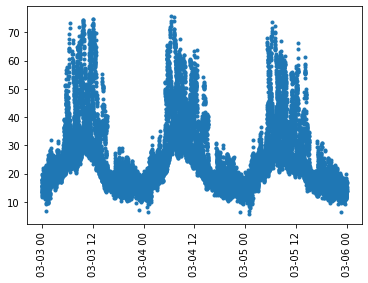

In [29]:
plt.plot(data_gps.Date_Time,data_gps.TEC_TOW,'.')
plt.xticks(rotation=90)

In [30]:
data_gps=data_gps.groupby(['Time']).apply(lambda gdf: gdf.assign(avg_TEC=lambda gdf: gdf['TEC_TOW'].mean()))#.droplevel(0)

(array([18324. , 18324.5, 18325. , 18325.5, 18326. , 18326.5, 18327. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

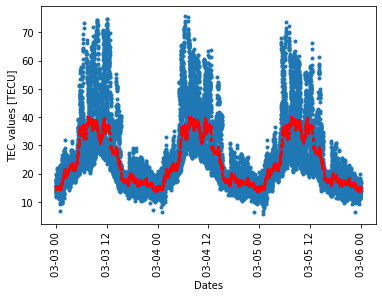

In [31]:
plt.plot(data_gps.Date_Time,data_gps.TEC_TOW,'.')
plt.plot(data_gps.Date_Time,data_gps.avg_TEC,'r.',markersize=2)
plt.xlabel('Dates')
plt.ylabel('TEC values [TECU]')
plt.xticks(rotation=90)

In [32]:
data_gps_2H=df = data_gps.groupby(pd.Grouper(freq='2H', key='Date_Time')).mean()

In [33]:
data_gps_2H

,WN,TOW,SVID,Value,Azimuth,Elevation,TEC_TOW,sbf2ismr_version_number,JT,VTEC,avg_TEC
Date_Time,,,,,,,,,,,
2020-03-03 00:00:00,2095.0,176593.672922,18.506702,628.0,169.584450,43.939678,17.047856,710.0,2458911.5,12.064799,16.646391
2020-03-03 02:00:00,2095.0,183682.464455,16.904028,628.0,176.627962,43.946682,21.251259,710.0,2458911.5,15.013017,21.517243
2020-03-03 04:00:00,2095.0,191020.747889,14.937274,628.0,192.962606,48.264174,26.144054,710.0,2458911.5,19.351493,28.082123
2020-03-03 06:00:00,2095.0,197985.088757,13.001183,628.0,171.585799,49.905325,32.033475,710.0,2458911.5,23.646710,36.345866
2020-03-03 08:00:00,2095.0,205067.287544,15.448196,628.0,173.775320,42.292200,38.715339,710.0,2458911.5,26.379902,37.522752
2020-03-03 10:00:00,2095.0,212269.801489,17.222084,628.0,193.708437,48.976427,39.879362,710.0,2458911.5,29.505329,34.908590
2020-03-03 12:00:00,2095.0,219570.209790,16.331469,628.0,143.697902,47.556643,33.386274,710.0,2458911.5,24.413054,30.966663
2020-03-03 14:00:00,2095.0,226490.310559,11.472050,628.0,189.048137,45.218944,23.324441,710.0,2458911.5,16.346021,23.250926
2020-03-03 16:00:00,2095.0,234298.813839,14.313015,628.0,175.896211,47.751236,17.526476,710.0,2458911.5,13.116537,18.000350


In [57]:
lsmrs=pd.read_csv('/home/bhuvi/Downloads/2020doy61-65.csv',delimiter=',',dtype=float,header=None)
lsmrs.columns=['Day','Hour','VTEC']

In [58]:
Start_date

datetime.datetime(2020, 3, 3, 0, 0)

In [59]:
lsmrs.VTEC=lsmrs.VTEC+4

In [61]:
lsmrs['hourss']=(24*lsmrs['Day']+lsmrs['Hour'])
lsmrs['Date_Time']=Start_date+datetime.timedelta(hours=1)*lsmrs['hourss']
lsmrs.set_index('Date_Time',inplace=True)
lsmrs

,Day,Hour,VTEC,hourss
Date_Time,,,,
2020-03-03 00:00:00,0.0,0.0,7.9,0.0
2020-03-03 02:00:00,0.0,2.0,11.9,2.0
2020-03-03 04:00:00,0.0,4.0,16.7,4.0
2020-03-03 06:00:00,0.0,6.0,24.0,6.0
2020-03-03 08:00:00,0.0,8.0,27.2,8.0
2020-03-03 10:00:00,0.0,10.0,28.7,10.0
2020-03-03 12:00:00,0.0,12.0,27.3,12.0
2020-03-03 14:00:00,0.0,14.0,20.9,14.0
2020-03-03 16:00:00,0.0,16.0,14.5,16.0


In [62]:
x=np.arange(0,73,2)
x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72])

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

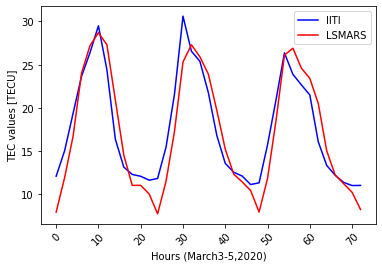

In [70]:
plt.plot(x,data_gps_2H.VTEC,'b',label='IITI')
plt.plot(x,lsmrs['VTEC'],'r',label='LSMARS')

#plt.xticks(hours)
plt.xlabel('Hours (March3-5,2020)')
plt.ylabel('TEC values [TECU]')
plt.legend()
#plt.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xticks(rotation=45)
#plt.savefig('lsmrsPlot',metadata='png',dpi=400)

In [65]:
lsmrs['IITI']=data_gps_2H.VTEC

In [66]:
lsmrs

,Day,Hour,VTEC,hourss,IITI
Date_Time,,,,,
2020-03-03 00:00:00,0.0,0.0,7.9,0.0,12.064799
2020-03-03 02:00:00,0.0,2.0,11.9,2.0,15.013017
2020-03-03 04:00:00,0.0,4.0,16.7,4.0,19.351493
2020-03-03 06:00:00,0.0,6.0,24.0,6.0,23.646710
2020-03-03 08:00:00,0.0,8.0,27.2,8.0,26.379902
2020-03-03 10:00:00,0.0,10.0,28.7,10.0,29.505329
2020-03-03 12:00:00,0.0,12.0,27.3,12.0,24.413054
2020-03-03 14:00:00,0.0,14.0,20.9,14.0,16.346021
2020-03-03 16:00:00,0.0,16.0,14.5,16.0,13.116537


In [1]:
RMSE=((lsmrs.IITI - lsmrs.VTEC) ** 2).mean() ** .5

NameError: name 'lsmrs' is not defined

In [ ]:
plt.plot(x,lsmrs.RMSE, 'RMSE')
plt.xlabel('RMSE

In [ ]:
array2=lsmrs.VTEC.to_numpy()
array2

In [ ]:
x=np.arange(0,72,1)
x

In [ ]:
#plt.plot(x,array1,'b',label='IITI')
plt.plot(x,array2,'r',label='LSMARS')

#plt.xticks(hours)
plt.xlabel('Dates')
plt.ylabel('TEC values [TECU]')
plt.xticks()